In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 경로
fontpath = '/Users/kimsoryun/Downloads/폰트/Pretendard-1/public/static/Pretendard-Medium.otf'
# 폰트 로드
font_prop = fm.FontProperties(fname=fontpath)

## 설문 조사 리뷰 선정 과정

In [4]:
data = pd.read_csv('misclassified_data_감성점수_정규표현식.csv')
data.head()

,Unnamed: 0,review,rank,Actual Label,Predicted Label,tokenized,Raw Sentiment Score,Normalized Sentiment Score
0,40571,생물보단 못해도 먹을만해요,4,1,0,생물보단먹을만해,0.215636,5.107818
1,154650,브레이킹패드를 한번 써보고 싶어서 주문했습니다. 괜찮은 패드인거 같네요ㅎㅎ,4,1,0,브레이킹패드싶어서주문괜찮은패드인거,2.073310,6.036655
2,156090,훈련소에서 배급받은 기분임,5,1,0,훈련소배급받은기분,-1.073574,4.463213
3,8046,특별할것없는듯...더써봐야겠지만...ㅎㅎ,4,1,0,특별할것없는듯봐야겠지만,-0.423589,4.788205
4,35547,써야할때 배송이 안와서 물거품됐지만 가격은 싼거같아요,5,1,0,써야배송거품됐지만가격싼거,-2.418268,3.790866


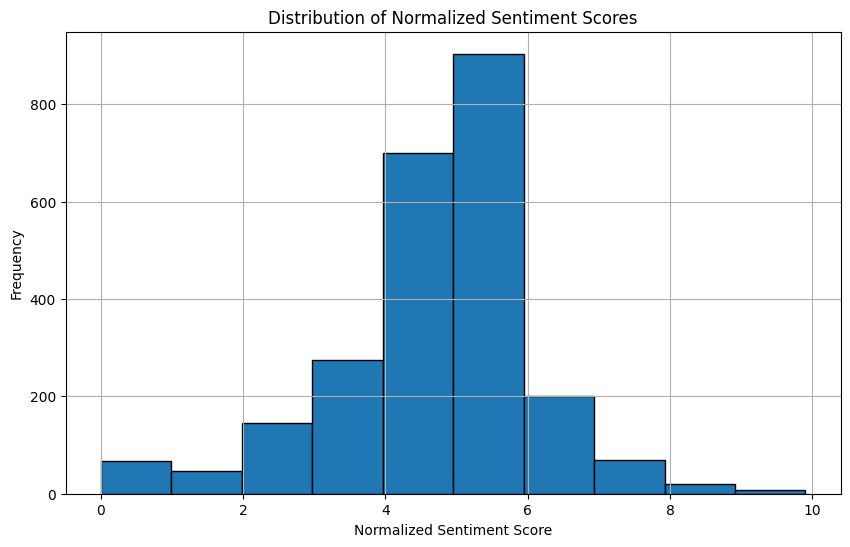

In [6]:
# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(data['Normalized Sentiment Score'], bins=10, edgecolor='black')
plt.title('Distribution of Normalized Sentiment Scores')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

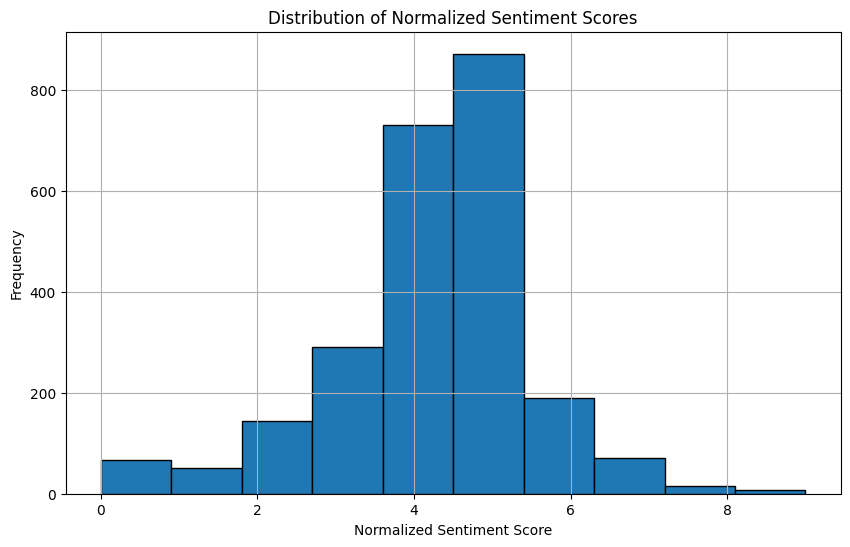

In [7]:
# 정수형 변환
data['Normalized Sentiment Score'] = data['Normalized Sentiment Score'].astype(int)

# 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(data['Normalized Sentiment Score'], bins=10, edgecolor='black')
plt.title('Distribution of Normalized Sentiment Scores')
plt.xlabel('Normalized Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

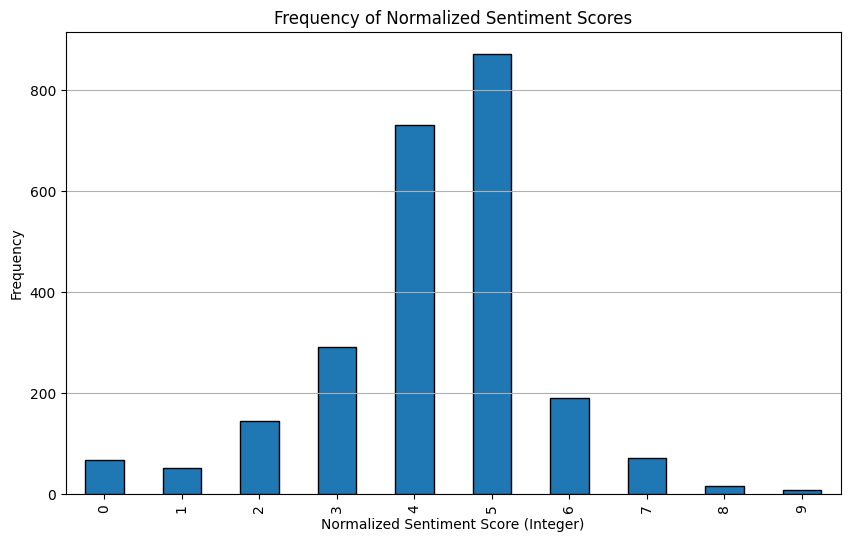

In [8]:
# 빈도수 카운트
score_counts = data['Normalized Sentiment Score'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', edgecolor='black')
plt.title('Frequency of Normalized Sentiment Scores')
plt.xlabel('Normalized Sentiment Score (Integer)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

## 설문 조사 응답 결과 비교 및 이상치 탐색

In [22]:
df = pd.read_csv('survey.csv')

In [23]:
df

,타임스탬프,리뷰 1\n\n핸드폰과 카드 약간의 현금 넣을수있어요~안경까지들어가면 정말 좋겠다했는데 핸드폰케이스를 안씌워서그런지 작은안경까지 넣을수있네요 ~ㅎ 좀 빡빡하긴 하지만 좋아요 가죽도 부드러워 맘에들어요,리뷰 2\n\n코트 걸기 좋아요. 어깨 모양때문에 두꺼운 옷걸이에 걸어 뒀었는데 이 옷 걸이로 바꾸고 옷장안이 여유가 생겼어요.,리뷰 3\n\n쓰기는편하고좋아요~배송도 빨라요. 향균처리가 되있어서 받은거 세탁안하셔도 될듯해요~ 받자마자 세탁했더니 광택이 좀빠지고 구김이 갔네요ㅠㅠ,리뷰 4\n\n좋아요 다른 인스타 공구마켓들보다 훨씬 저렴하게샀어요!다른데는 공구인데도 왜케 비싼지 모르겠네요ㅠㅠㅠㅠ자주이용할꼐요~~!!,리뷰 5\n\n매우 만족합니다 다만 유리에 검은게 얼룩덜룩 묻어서 지워지지 않네요 ㅜㅜ 그냥 쓰려구여,리뷰 6\n\n가정용 사다리로는 최고 같습니다. 몸무게가 많이 나가는 사람에게는 다소 약해 보이기도 합니다. 80kg은 안전하네요.,리뷰 7\n\n맛있어요 모양과 크기는 무지 좋은데 맛과종류를 잘모르겠어요 맛은 호박고구마 맛도 아니고 밤고매도 아닌것이 애매모합니다,리뷰 8\n\n우와~ 이정도는 아니예요..평타는 되네요!,리뷰 9\n\n이쁘고 깔끔하긴한데 마무리가.. 깨끗이 완벽하게 아무리하려도해도 힘드네요 ㅜㅜ 온갖 도구 다 사다날랏네요ㅜㅜ,리뷰 10\n\n생각보다 엄청 무겁네요. 반지를 끼고있는데 처음 설거지하다가 기스가 났어요.ㅠ 막 쓰기엔 좀 불편할듯해요 무겁기도하고,리뷰 11\n\n오자마자 깨끗이 닦아 물 끓이는데 물 끓이는 속도가 느린거 같아요~ 인덕션용이라해서 구매했고 자석 붙는거 까지 확인했는데~ 잘 못 구매한건가 생각함요~,리뷰 12\n\n이쁜데 고무가 너무 잘빠짐 싸구려티나요 많이 안경 끝 귀거는쪽 고무도 그냥 숙숙 빠지고 무겁고 안경너무 작아요 남잔데 알굴작은편인데도요
0,2024. 5. 25 오후 4:34:06,2.00,8.00,5.00,2.00,5.00,7.00,6.00,1.00,2.00,5.00,6.00,4.00
1,2024. 5. 25 오후 4:34:07,6.00,9.00,4.00,3.00,3.00,5.00,3.00,5.00,3.00,2.00,2.00,3.00
2,2024. 5. 25 오후 4:34:58,4.00,10.00,9.00,10.00,4.00,8.00,5.00,4.00,0.00,0.00,0.00,0.00
3,2024. 5. 25 오후 4:35:06,8.00,8.00,6.00,8.00,7.00,8.00,6.00,5.00,4.00,2.00,1.00,2.00
4,2024. 5. 25 오후 4:36:51,6.00,7.00,5.00,7.00,6.00,6.00,6.00,5.00,4.00,3.00,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,우리 감성 점수,9.16,9.31,8.78,8.65,6.89,6.79,6.42,5.42,4.88,3.26,3.72,0.00
63,편차 (관측값-평균),2.13,0.88,3.00,1.09,1.68,-0.38,1.52,1.16,1.59,0.64,1.36,-2.10
64,편차 제곱,4.52,0.78,8.97,1.20,2.82,0.15,2.31,1.34,2.52,0.41,1.84,4.39
65,분산,4.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 첫 번째 열 삭제
df = df.drop(df.columns[0], axis=1)

In [25]:
# 첫 번째 행의 이름을 바꿀 리스트 생성
new_column_names = ['Review 1', 'Review 2', 'Review 3', 'Review 4', 'Review 5', 'Review 6', 'Review 7', 'Review 8', 'Review 9', 'Review 10', 'Review 11', 'Review 12']

# 열 이름 변경
df.columns = new_column_names

# 변경된 데이터프레임 출력
df

,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,Review 11,Review 12
0,2.00,8.00,5.00,2.00,5.00,7.00,6.00,1.00,2.00,5.00,6.00,4.00
1,6.00,9.00,4.00,3.00,3.00,5.00,3.00,5.00,3.00,2.00,2.00,3.00
2,4.00,10.00,9.00,10.00,4.00,8.00,5.00,4.00,0.00,0.00,0.00,0.00
3,8.00,8.00,6.00,8.00,7.00,8.00,6.00,5.00,4.00,2.00,1.00,2.00
4,6.00,7.00,5.00,7.00,6.00,6.00,6.00,5.00,4.00,3.00,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...
62,9.16,9.31,8.78,8.65,6.89,6.79,6.42,5.42,4.88,3.26,3.72,0.00
63,2.13,0.88,3.00,1.09,1.68,-0.38,1.52,1.16,1.59,0.64,1.36,-2.10
64,4.52,0.78,8.97,1.20,2.82,0.15,2.31,1.34,2.52,0.41,1.84,4.39
65,4.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df.astype(float)

In [27]:
# 리뷰 응답 데이터 추출
reviews = df.iloc[:52, 0:]  # 0행부터 51행까지

In [28]:
reviews.head()

,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,Review 11,Review 12
0,2.0,8.0,5.0,2.0,5.0,7.0,6.0,1.0,2.0,5.0,6.0,4.0
1,6.0,9.0,4.0,3.0,3.0,5.0,3.0,5.0,3.0,2.0,2.0,3.0
2,4.0,10.0,9.0,10.0,4.0,8.0,5.0,4.0,0.0,0.0,0.0,0.0
3,8.0,8.0,6.0,8.0,7.0,8.0,6.0,5.0,4.0,2.0,1.0,2.0
4,6.0,7.0,5.0,7.0,6.0,6.0,6.0,5.0,4.0,3.0,3.0,5.0


In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Review 1   52 non-null     float64
 1   Review 2   52 non-null     float64
 2   Review 3   52 non-null     float64
 3   Review 4   52 non-null     float64
 4   Review 5   52 non-null     float64
 5   Review 6   52 non-null     float64
 6   Review 7   52 non-null     float64
 7   Review 8   52 non-null     float64
 8   Review 9   52 non-null     float64
 9   Review 10  52 non-null     float64
 10  Review 11  52 non-null     float64
 11  Review 12  52 non-null     float64
dtypes: float64(12)
memory usage: 5.0 KB


In [30]:
# 52번째부터 62번째 행까지 선택
subset_df = df.iloc[52:63]

# 새로운 데이터프레임으로 저장
new_df = subset_df.copy()

# 새로운 데이터프레임 출력
new_df

,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,Review 11,Review 12
52,7.04,8.42,5.79,7.56,5.21,7.17,4.90,4.27,3.29,2.62,2.37,2.10
53,3.00,8.50,6.00,5.50,6.50,7.00,5.00,2.50,2.50,3.00,3.50,3.00
54,2.00,0.50,2.00,24.50,4.50,0.00,2.00,4.50,0.50,8.00,12.50,2.00
55,1.41,0.71,1.41,4.95,2.12,0.00,1.41,2.12,0.71,2.83,3.54,1.41
56,2.00,1.00,2.00,7.00,3.00,0.00,2.00,3.00,1.00,4.00,5.00,2.00
57,2.00,3.00,2.00,1.00,0.00,4.00,2.00,1.00,0.00,0.00,0.00,0.00
58,6.00,7.75,5.00,6.00,4.00,6.00,4.00,3.00,2.00,1.00,1.00,0.00
59,7.00,9.00,6.00,8.00,5.00,7.00,5.00,4.50,3.00,2.00,2.00,2.00
60,8.00,10.00,7.00,10.00,6.00,8.00,6.00,5.00,4.00,3.25,3.25,3.00
61,10.00,10.00,10.00,10.00,10.00,10.00,7.00,7.00,8.00,8.00,7.00,7.00


In [31]:
# 새로운 열 이름 리스트
new_column_names = ['평균', '중위수', '분산', '표준편차', '범위', 
                    '사분위수0', '사분위수25', '사분위수50', '사분위수75', '사분위수100', 
                    '감성점수']

# 새로운 열 추가
new_df.insert(0, '이름', new_column_names)

# 수정된 데이터프레임 출력
new_df

,이름,Review 1,Review 2,Review 3,Review 4,Review 5,Review 6,Review 7,Review 8,Review 9,Review 10,Review 11,Review 12
52,평균,7.04,8.42,5.79,7.56,5.21,7.17,4.90,4.27,3.29,2.62,2.37,2.10
53,중위수,3.00,8.50,6.00,5.50,6.50,7.00,5.00,2.50,2.50,3.00,3.50,3.00
54,분산,2.00,0.50,2.00,24.50,4.50,0.00,2.00,4.50,0.50,8.00,12.50,2.00
55,표준편차,1.41,0.71,1.41,4.95,2.12,0.00,1.41,2.12,0.71,2.83,3.54,1.41
56,범위,2.00,1.00,2.00,7.00,3.00,0.00,2.00,3.00,1.00,4.00,5.00,2.00
57,사분위수0,2.00,3.00,2.00,1.00,0.00,4.00,2.00,1.00,0.00,0.00,0.00,0.00
58,사분위수25,6.00,7.75,5.00,6.00,4.00,6.00,4.00,3.00,2.00,1.00,1.00,0.00
59,사분위수50,7.00,9.00,6.00,8.00,5.00,7.00,5.00,4.50,3.00,2.00,2.00,2.00
60,사분위수75,8.00,10.00,7.00,10.00,6.00,8.00,6.00,5.00,4.00,3.25,3.25,3.00
61,사분위수100,10.00,10.00,10.00,10.00,10.00,10.00,7.00,7.00,8.00,8.00,7.00,7.00


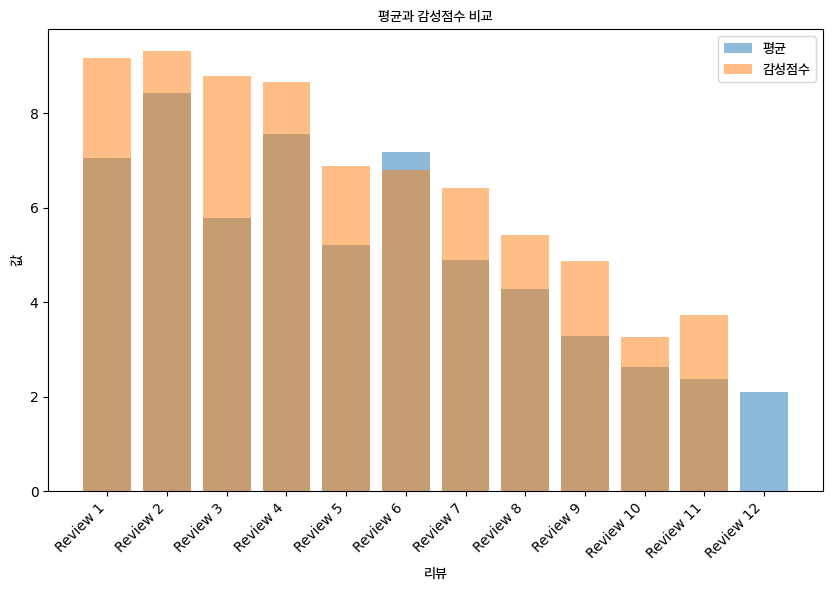

In [32]:
# 열 이름을 가져와서 리뷰 목록 생성
reviews_col = list(new_df.columns[1:])

# '평균' 행과 '감성점수' 행 선택
row_mean = new_df[new_df['이름'] == '평균'].iloc[:, 1:].values.flatten()
row_sentiment = new_df[new_df['이름'] == '감성점수'].iloc[:, 1:].values.flatten()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x=reviews_col, height=row_mean, label='평균', alpha=0.5)
plt.bar(x=reviews_col, height=row_sentiment, label='감성점수', alpha=0.5)
plt.xlabel('리뷰', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.title('평균과 감성점수 비교', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(rotation=45, ha='right')  # x 축 레이블을 45도로 회전하여 표시
plt.show()

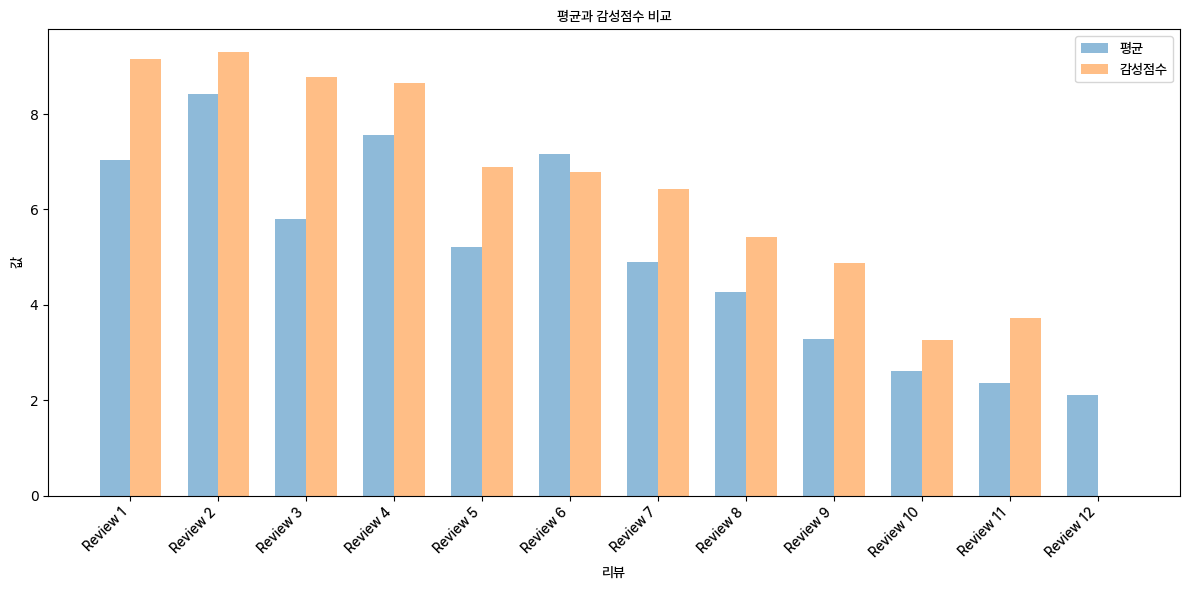

In [33]:
# 각 막대의 너비
bar_width = 0.35

# 각각의 막대 위치 계산
x = np.arange(len(reviews_col))

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, row_mean, bar_width, label='평균', alpha=0.5)
plt.bar(x + bar_width/2, row_sentiment, bar_width, label='감성점수', alpha=0.5)
plt.xlabel('리뷰', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.title('평균과 감성점수 비교', fontproperties=font_prop)
plt.xticks(ticks=x, labels=reviews_col, rotation=45, ha='right', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [37]:
# reviews 데이터프레임 복제하여 reviews_new 생성
reviews_new = reviews.copy()

for col in reviews_new.columns:
    # 각 열에 대한 이상치 탐색
    mean = reviews_new[col].mean()
    std = reviews_new[col].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    
    outliers = []
    for val in reviews_new[col]:
        if val < lower_bound or val > upper_bound:
            outliers.append(val)

    print(f"{col} 열의 이상치:", outliers)

    # 이상치를 평균으로 대체 (반올림하여 소수점 둘째자리까지)
    for idx, val in enumerate(reviews_new[col]):
        if val < lower_bound or val > upper_bound:
            reviews_new.at[idx, col] = round(mean, 2)
            print(f"{col} 열의 이상치 처리 완료")

Review 1 열의 이상치: [2.0, 3.0]
Review 1 열의 이상치 처리 완료
Review 1 열의 이상치 처리 완료
Review 2 열의 이상치: [3.0, 5.0]
Review 2 열의 이상치 처리 완료
Review 2 열의 이상치 처리 완료
Review 3 열의 이상치: [2.0, 10.0, 2.0, 10.0, 10.0]
Review 3 열의 이상치 처리 완료
Review 3 열의 이상치 처리 완료
Review 3 열의 이상치 처리 완료
Review 3 열의 이상치 처리 완료
Review 3 열의 이상치 처리 완료
Review 4 열의 이상치: [2.0, 2.0, 1.0]
Review 4 열의 이상치 처리 완료
Review 4 열의 이상치 처리 완료
Review 4 열의 이상치 처리 완료
Review 5 열의 이상치: [0.0, 10.0]
Review 5 열의 이상치 처리 완료
Review 5 열의 이상치 처리 완료
Review 6 열의 이상치: [4.0]
Review 6 열의 이상치 처리 완료
Review 7 열의 이상치: [2.0, 2.0]
Review 7 열의 이상치 처리 완료
Review 7 열의 이상치 처리 완료
Review 8 열의 이상치: [1.0, 1.0, 1.0]
Review 8 열의 이상치 처리 완료
Review 8 열의 이상치 처리 완료
Review 8 열의 이상치 처리 완료
Review 9 열의 이상치: [8.0]
Review 9 열의 이상치 처리 완료
Review 10 열의 이상치: [7.0, 8.0, 7.0]
Review 10 열의 이상치 처리 완료
Review 10 열의 이상치 처리 완료
Review 10 열의 이상치 처리 완료
Review 11 열의 이상치: [7.0, 7.0]
Review 11 열의 이상치 처리 완료
Review 11 열의 이상치 처리 완료
Review 12 열의 이상치: [7.0, 7.0]
Review 12 열의 이상치 처리 완료
Review 12 열의 이상치 처리 완료


In [38]:
# 대푯값 계산
median_values = reviews_new.median()
mean_values = reviews_new.mean()
mode_values = reviews_new.mode().iloc[0]  # 최빈값은 mode() 함수를 사용하되, mode()는 DataFrame을 반환하기 때문에 iloc[0]으로 첫 번째 행을 선택

# 결과 출력
summary_stats = pd.DataFrame({'Median': median_values, 'Mean': mean_values, 'Mode': mode_values})
print('1차 이상치 처리 결과 \n')
print(summary_stats)

1차 이상치 처리 결과 

           Median      Mean  Mode
Review 1    7.000  7.213077   7.0
Review 2    9.000  8.593077  10.0
Review 3    6.000  5.691346   6.0
Review 4    8.000  7.897692  10.0
Review 5    5.000  5.219615   6.0
Review 6    7.000  7.234038   8.0
Review 7    5.000  5.015385   6.0
Review 8    4.635  4.457885   5.0
Review 9    3.000  3.197885   3.0
Review 10   2.000  2.343462   2.0
Review 11   2.000  2.187308   2.0
Review 12   2.000  1.907692   0.0
